In [38]:
import numpy as np
import pandas as pd

In [ ]:
# a. Title and context of the data topic.
#       The data set I will use is drinksdata.csv file which has information on drink servings by country. We can use this to practice data cleaning and preparation. 

# b. Resource links and download addresses of the dataset.
#       The link to the dataset on my GitHub Account is : https://github.com/ckombem/ANA-522
#       The link to raw data is : "https://raw.githubusercontent.com/ckombem/ANA-522/main/drinksdata.csv"

# c. A copy of the dataset file is to be submitted alongside with the Jupyter Notebook report.
#       Done - 'drinksdata.csv'

In [2]:
# Create a full field list and description of the dataset attributes and its overview.
# Loading the Drinks Dataset from my GitHub account.

drinks = pd.read_csv('https://raw.githubusercontent.com/ckombem/ANA-522/main/drinksdata.csv')
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,NaN,NaN,NaN,NaN
1,Albania,89.0,132.0,54.0,4.9
2,Algeria,25.0,0.0,14.0,0.7
3,Andorra,245.0,138.0,312.0,12.4
4,Angola,217.0,57.0,45.0,5.9
...,...,...,...,...,...
188,Venezuela,333.0,100.0,3.0,7.7
189,Vietnam,111.0,2.0,1.0,2.0
190,Yemen,6.0,0.0,0.0,0.1
191,Zambia,32.0,19.0,4.0,2.5


In [ ]:
# Handling Missing Data.
# • Apply any technique covered in the text reading of this week to exam the data, filter out
# and fill in missing data, remove duplicates, rename proper names to meet the context
# of the data topic.
# • Provide informative descriptions and comments to these data cleaning opertions performed in the context of the data topic.

In [3]:
# Examining Data Types indicates that we have one column with objects and the rest are float64 .
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                 float64
wine_servings                   float64
total_litres_of_pure_alcohol    float64
dtype: object

In [4]:
# Count servings per column having missing attribute values (NA).

bs = drinks['beer_servings'].isnull().sum()
print('There are', bs, 'entries whose beer_servings values is NA')

ss = drinks['spirit_servings'].isnull().sum()
print('There are', ss, 'entries whose spirit_servings values is NA')

ws = drinks['wine_servings'].isnull().sum()
print('There are', ws, 'entries whose wine_servings values is NA')

There are 13 entries whose beer_servings values is NA
There are 13 entries whose spirit_servings values is NA
There are 13 entries whose wine_servings values is NA


In [5]:
# filter out and identify columns with missing data.
s_NA = pd.isnull(drinks[['beer_servings', 'spirit_servings', 'wine_servings']])
print(drinks[s_NA])

    country  beer_servings  spirit_servings  wine_servings  \
0       NaN            NaN              NaN            NaN   
1       NaN            NaN              NaN            NaN   
2       NaN            NaN              NaN            NaN   
3       NaN            NaN              NaN            NaN   
4       NaN            NaN              NaN            NaN   
..      ...            ...              ...            ...   
188     NaN            NaN              NaN            NaN   
189     NaN            NaN              NaN            NaN   
190     NaN            NaN              NaN            NaN   
191     NaN            NaN              NaN            NaN   
192     NaN            NaN              NaN            NaN   

     total_litres_of_pure_alcohol  
0                             NaN  
1                             NaN  
2                             NaN  
3                             NaN  
4                             NaN  
..                            ...  
188

In [6]:
# Fill in missing data with zeros.
drinks.fillna(0)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0.0,0.0,0.0,0.0
1,Albania,89.0,132.0,54.0,4.9
2,Algeria,25.0,0.0,14.0,0.7
3,Andorra,245.0,138.0,312.0,12.4
4,Angola,217.0,57.0,45.0,5.9
...,...,...,...,...,...
188,Venezuela,333.0,100.0,3.0,7.7
189,Vietnam,111.0,2.0,1.0,2.0
190,Yemen,6.0,0.0,0.0,0.1
191,Zambia,32.0,19.0,4.0,2.5


In [7]:
# Create another datset and rename the last column from 'total_litres_of_pure_alcohol' to 'total_servings'

drinks.rename(columns={'total_litres_of_pure_alcohol':'total_servings'}, inplace=True)
drinks

,country,beer_servings,spirit_servings,wine_servings,total_servings
0,Afghanistan,NaN,NaN,NaN,NaN
1,Albania,89.0,132.0,54.0,4.9
2,Algeria,25.0,0.0,14.0,0.7
3,Andorra,245.0,138.0,312.0,12.4
4,Angola,217.0,57.0,45.0,5.9
...,...,...,...,...,...
188,Venezuela,333.0,100.0,3.0,7.7
189,Vietnam,111.0,2.0,1.0,2.0
190,Yemen,6.0,0.0,0.0,0.1
191,Zambia,32.0,19.0,4.0,2.5


In [8]:
# Verifying the summary statistics of our data.
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_servings
count,180.000000,180.000000,180.000000,180.000000
mean,113.827778,86.844444,53.022222,5.057778
std,100.475230,88.596431,81.379239,3.679552
min,0.000000,0.000000,0.000000,0.100000
25%,25.000000,11.000000,2.000000,1.775000
50%,80.500000,66.000000,9.500000,4.800000
75%,193.250000,133.000000,73.250000,7.625000
max,376.000000,438.000000,370.000000,14.400000


In [9]:
# Find out the wine_servings categories in quartiles of all servings in the dataset.
quartiles = pd.qcut(drinks['wine_servings'], 4)
quartilesCount = quartiles.value_counts()
quartilesCount

(-0.001, 2.0]     52
(9.5, 73.25]      45
(73.25, 370.0]    45
(2.0, 9.5]        38
Name: wine_servings, dtype: int64

In [10]:
# Find out the spirit_servings distributions of servings in the dataset using the age bins in the list.
bins = [10, 35, 50, 75, 90, 180]
drinks['spirit_servings'] = pd.cut(drinks['spirit_servings'], bins)
drinks['spirit_servings'].value_counts()

(90, 180]    46
(10, 35]     28
(50, 75]     19
(35, 50]      9
(75, 90]      8
Name: spirit_servings, dtype: int64

In [12]:
# Loading the Drinks Dataset from my GitHub account.
drinks = pd.read_csv('https://raw.githubusercontent.com/ckombem/ANA-522/main/drinksdata2.csv')
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9
...,...,...,...,...,...
188,Venezuela,333,100,3,7.7
189,Vietnam,111,2,1,2.0
190,Yemen,6,0,0,0.1
191,Zambia,32,19,4,2.5


In [13]:
# Example of using set_index() to transform the drinks dataset with hierarchical indexing by setting multiple index with country and total_litres_of_pure_alcohol

Ctry_tt_index = drinks.set_index(['country','total_litres_of_pure_alcohol'])
drinks_sorted = Ctry_tt_index.sort_index()
drinks_sorted 

,,beer_servings,spirit_servings,wine_servings
country,total_litres_of_pure_alcohol,,,
Afghanistan,0.0,0,0,0
Albania,4.9,89,132,54
Algeria,0.7,25,0,14
Andorra,12.4,245,138,312
Angola,5.9,217,57,45
...,...,...,...,...
Venezuela,7.7,333,100,3
Vietnam,2.0,111,2,1
Yemen,0.1,6,0,0


In [14]:
# Create a Series of drink servings for every multiple index combination of country and total_litres_of_pure_alcohol.
drinks_sorted.stack() 

country      total_litres_of_pure_alcohol                 
Afghanistan  0.0                           beer_servings        0
                                           spirit_servings      0
                                           wine_servings        0
Albania      4.9                           beer_servings       89
                                           spirit_servings    132
                                                             ... 
Zambia       2.5                           spirit_servings     19
                                           wine_servings        4
Zimbabwe     4.7                           beer_servings       64
                                           spirit_servings     18
                                           wine_servings        4
Length: 579, dtype: int64

In [15]:
# Transform datset so that total_litres_of_pure_alcohol is of multiple index of columns
drinks_sorted.unstack() 

beer_servings                                \
total_litres_of_pure_alcohol          0.0  0.1  0.2  0.3  0.4  0.5  0.6    
country                                                                    
Afghanistan                            0.0  NaN  NaN  NaN  NaN  NaN  NaN   
Albania                                NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Algeria                                NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Andorra                                NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Angola                                 NaN  NaN  NaN  NaN  NaN  NaN  NaN   
...                                    ...  ...  ...  ...  ...  ...  ...   
Venezuela                              NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Vietnam                                NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Yemen                                  NaN  6.0  NaN  NaN  NaN  NaN  NaN   
Zambia                                 NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Zimbabwe                               NaN  NaN  NaN  NaN  NaN  NaN  NaN   

                                              ... wine_servings            \
total_litres_of_pure_alcohol  0.7  0.8  0.9   ...          10.9 11.0 11.3   
country                                       ...                           
Afghanistan                    NaN  NaN  NaN  ...           NaN  NaN  NaN   
Albania                        NaN  NaN  NaN  ...           NaN  NaN  NaN   
Algeria                       25.0  NaN  NaN  ...           NaN  NaN  NaN   
Andorra                        NaN  NaN  NaN  ...           NaN  NaN  NaN   
Angola                         NaN  NaN  NaN  ...           NaN  NaN  NaN   
...                            ...  ...  ...  ...           ...  ...  ...   
Venezuela                      NaN  NaN  NaN  ...           NaN  NaN  NaN   
Vietnam                        NaN  NaN  NaN  ...           NaN  NaN  NaN   
Yemen                          NaN  NaN  NaN  ...           NaN  NaN  NaN   
Zambia                         NaN  NaN  NaN  ...           NaN  NaN  NaN   
Zimbabwe                       NaN  NaN  NaN  ...           NaN  NaN  NaN   

                                                                   
total_litres_of_pure_alcohol 11.4 11.5 11.8 11.9   12.4 12.9 14.4  
country                                                            
Afghanistan                   NaN  NaN  NaN  NaN    NaN  NaN  NaN  
Albania                       NaN  NaN  NaN  NaN    NaN  NaN  NaN  
Algeria                       NaN  NaN  NaN  NaN    NaN  NaN  NaN  
Andorra                       NaN  NaN  NaN  NaN  312.0  NaN  NaN  
Angola                        NaN  NaN  NaN  NaN    NaN  NaN  NaN  
...                           ...  ...  ...  ...    ...  ...  ...  
Venezuela                     NaN  NaN  NaN  NaN    NaN  NaN  NaN  
Vietnam                       NaN  NaN  NaN  NaN    NaN  NaN  NaN  
Yemen                         NaN  NaN  NaN  NaN    NaN  NaN  NaN  
Zambia                        NaN  NaN  NaN  NaN    NaN  NaN  NaN  
Zimbabwe                      NaN  NaN  NaN  NaN    NaN  NaN  NaN  

[193 rows x 270 columns]

In [16]:
# Compute total beer_servings by country using drinks_sorted.
drinks_sorted.groupby(['country'])['beer_servings'].sum()

country
Afghanistan      0
Albania         89
Algeria         25
Andorra        245
Angola         217
              ... 
Venezuela      333
Vietnam        111
Yemen            6
Zambia          32
Zimbabwe        64
Name: beer_servings, Length: 193, dtype: int64

In [ ]:
# We can easily estimate the respective servings per country while estimating the total liters of serving had in these respective countries.
# On the other hand, we get this information grouped out by countries when we use the stack function. It gives a great summary of total servings alongside totals of the respective servings. 
# The unstack formula helps us figure out which ber servings using the total liters as the key column estimate.
# The final question was to compute total beer_servings by country using drinks_sorted.

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

In [21]:
# Resetting the X and Y plot axixs 
plt.rcParams['figure.figsize'] = (15, 10)

In [22]:
# Loading the Drinks Dataset from my GitHub account.
drinks = pd.read_csv('https://raw.githubusercontent.com/ckombem/ANA-522/main/drinksdata2.csv')
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9
...,...,...,...,...,...
188,Venezuela,333,100,3,7.7
189,Vietnam,111,2,1,2.0
190,Yemen,6,0,0,0.1
191,Zambia,32,19,4,2.5


<AxesSubplot:ylabel='country'>

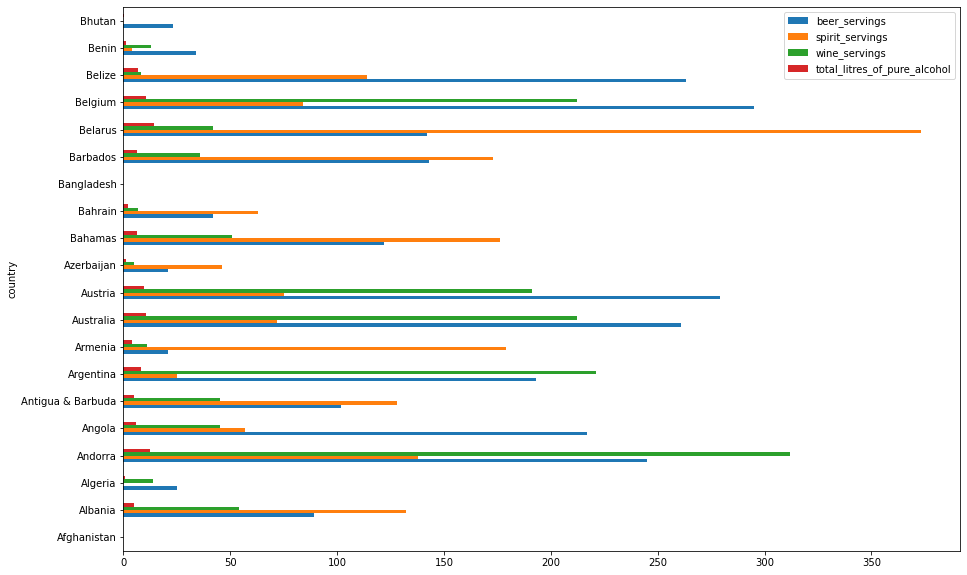

In [23]:
# Horizontal bar chat for all servings by country with legends and using different colors.

# Getting serving details for the top 20 countries just to make data more presentable.
x = drinks.head(20)
# Setting data index to countries
xy = x.set_index(['country'])
# Plotting a horizontal bar chart with adjusted index and label
xy.plot.barh()

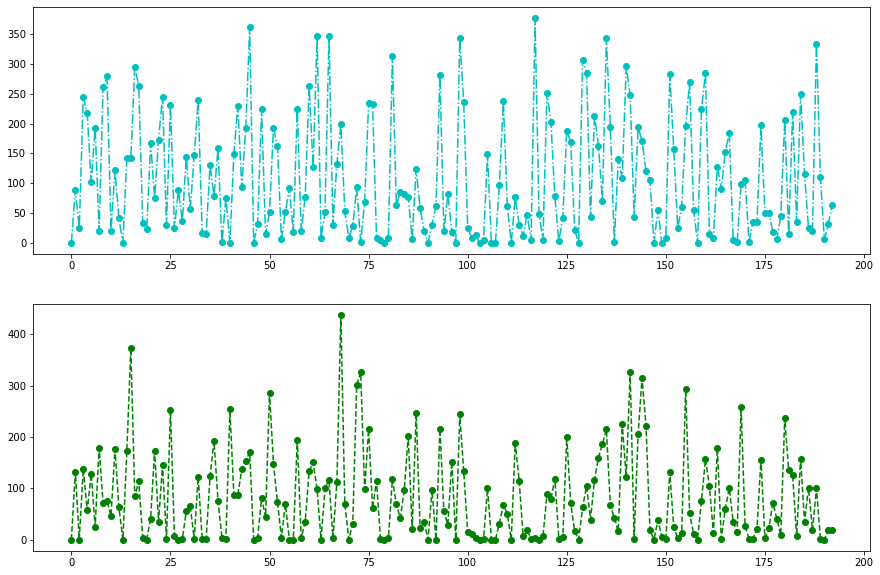

In [24]:
# Draw a Subplots for beer_servings and spirit_servings doses using different line plot forms.
# Setting up figure object.
fig = plt.figure()
# Creating subplot framework.
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
# Plotting different line plots with markers for beer and spirit servings.
ax1.plot(drinks['beer_servings'], 'co-.')
ax2.plot(drinks['spirit_servings'],  'go--')

In [25]:
# Draw a Scatter plot for total_litres_of_pure_alcohol with legends.

# Resetting dataset index
dx = drinks.reset_index()
# Specifying index title for countries
dx['index']=dx.index.to_series().shift(-1)
dx

,index,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,1.0,Afghanistan,0,0,0,0.0
1,2.0,Albania,89,132,54,4.9
2,3.0,Algeria,25,0,14,0.7
3,4.0,Andorra,245,138,312,12.4
4,5.0,Angola,217,57,45,5.9
...,...,...,...,...,...,...
188,189.0,Venezuela,333,100,3,7.7
189,190.0,Vietnam,111,2,1,2.0
190,191.0,Yemen,6,0,0,0.1
191,192.0,Zambia,32,19,4,2.5


In [26]:
# Extracting data only for index and total_litres_of_pure_alcohol.
data = dx[['index','total_litres_of_pure_alcohol']]
data

,index,total_litres_of_pure_alcohol
0,1.0,0.0
1,2.0,4.9
2,3.0,0.7
3,4.0,12.4
4,5.0,5.9
...,...,...
188,189.0,7.7
189,190.0,2.0
190,191.0,0.1
191,192.0,2.5


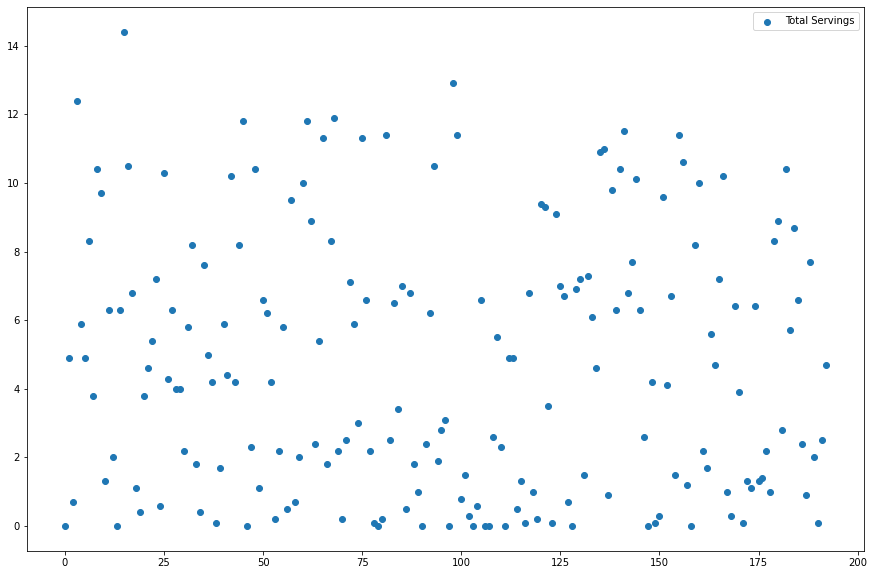

In [27]:
# Plotting scatter plot for Total Servings by index
plt.scatter(data.index, data.total_litres_of_pure_alcohol, label = 'Total Servings')
plt.legend()

/opt/conda/envs/ADA522/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_litres_of_pure_alcohol', ylabel='Density'>

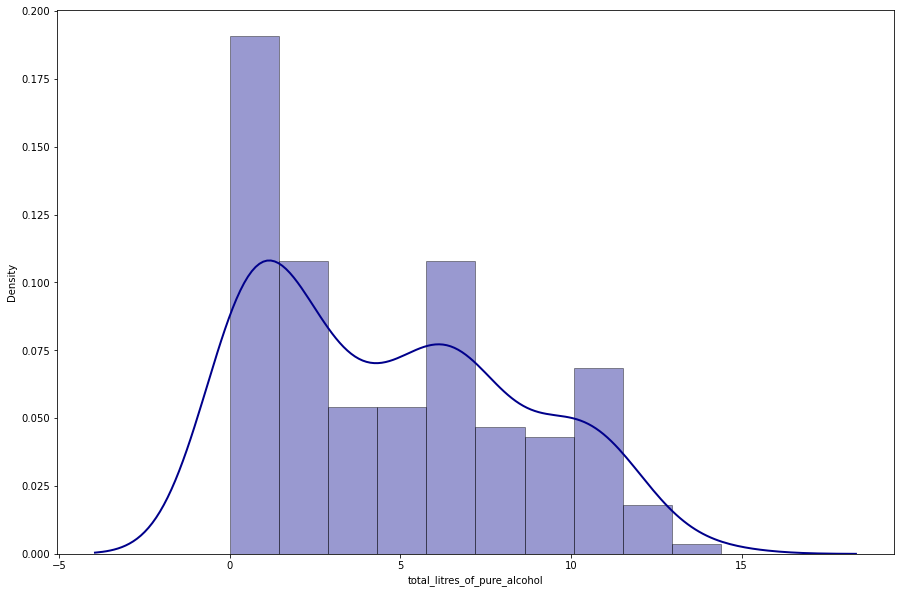

In [35]:
# Create either a density distribution plot from Administered column (or with histogram bins set to 10 using seaborn)

import seaborn as sns

sns.distplot(dx['total_litres_of_pure_alcohol'], hist=True, kde=True, 
             bins=int(10), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

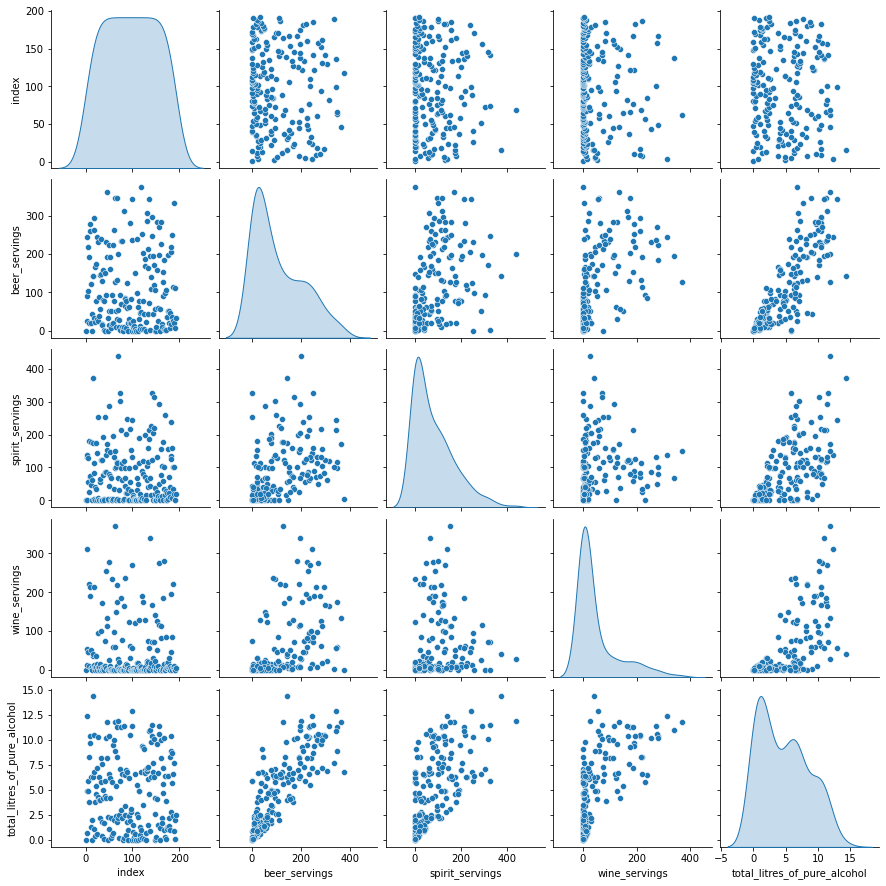

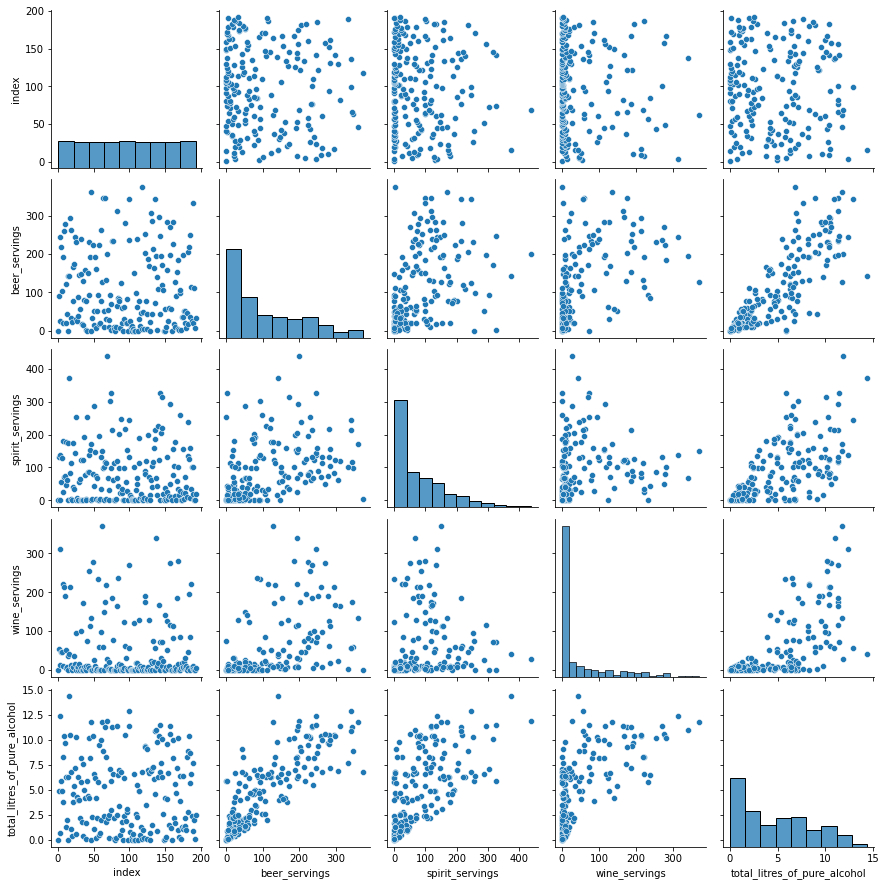

In [37]:
# Create a pairs plot or scatter plot matrix in between Administered_Janssen, Administered_Moderna, Administered_Pfizer, Administered_Unk_Manuf columns using seaborn. 
sns.pairplot(dx, diag_kind='kde', plot_kws={'alpha': 1})
sns.pairplot(dx, diag_kind='hist', plot_kws={'alpha': 1})